In [ ]:
import pandas as pd
import random

# Define the possible values for Class Participation
class_participation_levels = ['Low', 'Medium', 'High']

# Generate random data for 50 students
data = {
    'Score': [random.randint(1, 100) for _ in range(50)],
    'Attendance': [random.randint(1, 100) for _ in range(50)],
    'Self Study': [random.randint(1, 100) for _ in range(50)],
    'Class Participation': [random.choice(class_participation_levels) for _ in range(50)],
    'A/Q Weightage': [random.randint(1, 100) for _ in range(50)]
}

# Create a DataFrame from the generated data
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('student_dataset.csv', index=False)

# Print the first 5 rows of the dataset
print(df.head())

df.shape


   Score  Attendance  Self Study Class Participation  A/Q Weightage
0     85          56          86                 Low             23
1      2          13          80              Medium             39
2     95          76          93              Medium              3
3     83          74          10              Medium             50
4     98          32           3                 Low             77


(50, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Score                50 non-null     int64 
 1   Attendance           50 non-null     int64 
 2   Self Study           50 non-null     int64 
 3   Class Participation  50 non-null     object
 4   A/Q Weightage        50 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isnull()


,Score,Attendance,Self Study,Class Participation,A/Q Weightage
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:
df.shape

(50, 5)

In [ ]:
df.dtypes

Score                   int64
Attendance              int64
Self Study              int64
Class Participation    object
A/Q Weightage           int64
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,50.0,53.50,32.497567,1.0,30.50,49.0,86.50,100.0
Attendance,50.0,48.28,33.245555,3.0,15.25,47.0,74.75,100.0
Self Study,50.0,53.52,32.359107,2.0,24.25,57.0,85.00,100.0
A/Q Weightage,50.0,45.66,26.781512,1.0,23.25,41.0,65.25,95.0


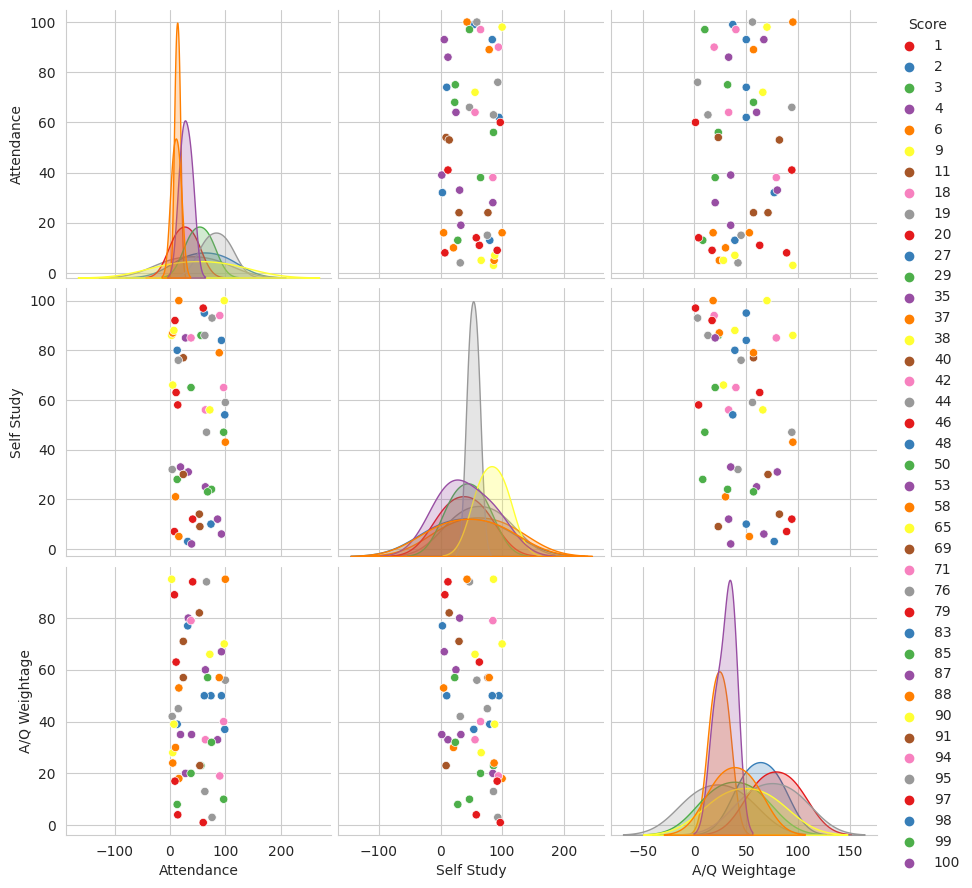

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(
df[["Score", "Attendance", "Self Study", "Class Participation", "A/Q Weightage"]],
hue = "Score",
height = 3,
palette = "Set1")

<ipython-input-21-d7d72c698a14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

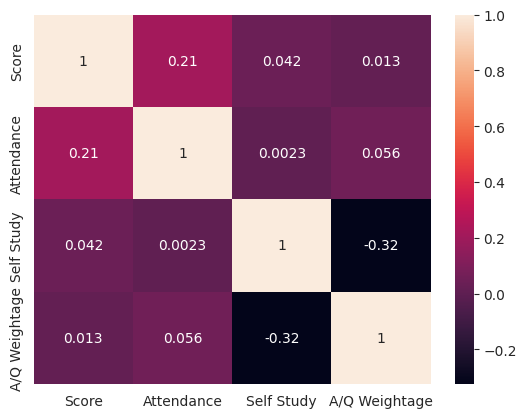

In [ ]:
sns.heatmap(df.corr(), annot= True)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['Score', 'Attendance', 'Self Study', 'A/Q Weightage',
       'Class Participation_High', 'Class Participation_Low',
       'Class Participation_Medium'],
      dtype='object')

In [ ]:
y = data["Score"]

In [ ]:
X = df.drop("Score", axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
X,y,
train_size = 0.80,
random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test, y_test).round(3)
lr.score(X_train, y_train).round(3)
y_pred = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test, y_pred))
data_new = X_train[:1]
lr.predict(data_new)
y_train[:1]

[76]

In [ ]:
from sklearn import datasets, model_selection, metrics, tree
import pandas as pd
target = data["Score"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(df, target, test_size=0.2, random_state=0)
print("Training Dataset:", X_train.shape)
print("Test Dataset:", X_test.shape)
classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
model

Training Dataset: (40, 7)
Test Dataset: (10, 7)


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
          40       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       1.0
          58       0.00      0.00      0.00       0.0
          69       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       1.0
          94       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       0.0
          98       0.00      0.00      0.00       2.0
          99       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

0.0

Task 2

In [ ]:
import pandas as pd
import random

# Function to generate a random phone number
def generate_phone_number():
    customer_id = random.randint(1000, 9999)  # Random customer ID
    phone_number = ''.join(random.choices('0123456789', k=10))  # Generate a random 10-digit phone number
    return customer_id, phone_number

# Generate data for 50 phone numbers
data = []
for _ in range(50):
    customer_id, phone_number = generate_phone_number()
    unique_digits = len(set(phone_number))  # Count unique digits
    repeated_digits = len(phone_number) - unique_digits  # Count repeated digits
    longest_repeated_digit = max([phone_number.count(digit) for digit in set(phone_number)])  # Length of longest repeated digit
    pattern_exists = 'Yes' if longest_repeated_digit > 1 else 'No'  # Check if any digit is repeated
    price_category = random.choice(['Low', 'Medium', 'High'])  # Random price category

    # Append data to the list
    data.append([customer_id, unique_digits, repeated_digits, longest_repeated_digit, pattern_exists, price_category])

# Create a DataFrame from the generated data
columns = ['Customer ID', 'Unique Digits', 'No of Repeated Digits', 'Length of Longest Repeated Digit', 'Pattern Exists', 'Price Category']
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
df.to_csv('phone_numbers_dataset.csv', index=False)

print("Dataset saved to 'phone_numbers_dataset.csv'")

df.head()


Dataset saved to 'phone_numbers_dataset.csv'


,Customer ID,Unique Digits,No of Repeated Digits,Length of Longest Repeated Digit,Pattern Exists,Price Category
0,1582,7,3,3,Yes,High
1,2882,6,4,4,Yes,High
2,9297,8,2,3,Yes,Low
3,9653,8,2,2,Yes,High
4,6514,5,5,3,Yes,Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Customer ID                       50 non-null     int64 
 1   Unique Digits                     50 non-null     int64 
 2   No of Repeated Digits             50 non-null     int64 
 3   Length of Longest Repeated Digit  50 non-null     int64 
 4   Pattern Exists                    50 non-null     object
 5   Price Category                    50 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [ ]:
df.isnull()

,Customer ID,Unique Digits,No of Repeated Digits,Length of Longest Repeated Digit,Pattern Exists,Price Category
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Customer ID                         0
Unique Digits                       0
No of Repeated Digits               0
Length of Longest Repeated Digit    0
Pattern Exists                      0
Price Category                      0
dtype: int64

In [ ]:
df.dtypes

Customer ID                          int64
Unique Digits                        int64
No of Repeated Digits                int64
Length of Longest Repeated Digit     int64
Pattern Exists                      object
Price Category                      object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,50.0,5774.78,2650.206417,1042.0,3795.5,6292.5,7834.5,9653.0
Unique Digits,50.0,6.40,1.030158,4.0,6.0,6.0,7.0,8.0
No of Repeated Digits,50.0,3.60,1.030158,2.0,3.0,4.0,4.0,6.0
Length of Longest Repeated Digit,50.0,2.88,0.824126,2.0,2.0,3.0,3.0,5.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['mean', 'std'], ['std', 'min'], ['min', '25%'], ['25%', '50%']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['count', 'mean', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['count', 'std', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['count', 'min', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['count', '25%', None], **{})
chart

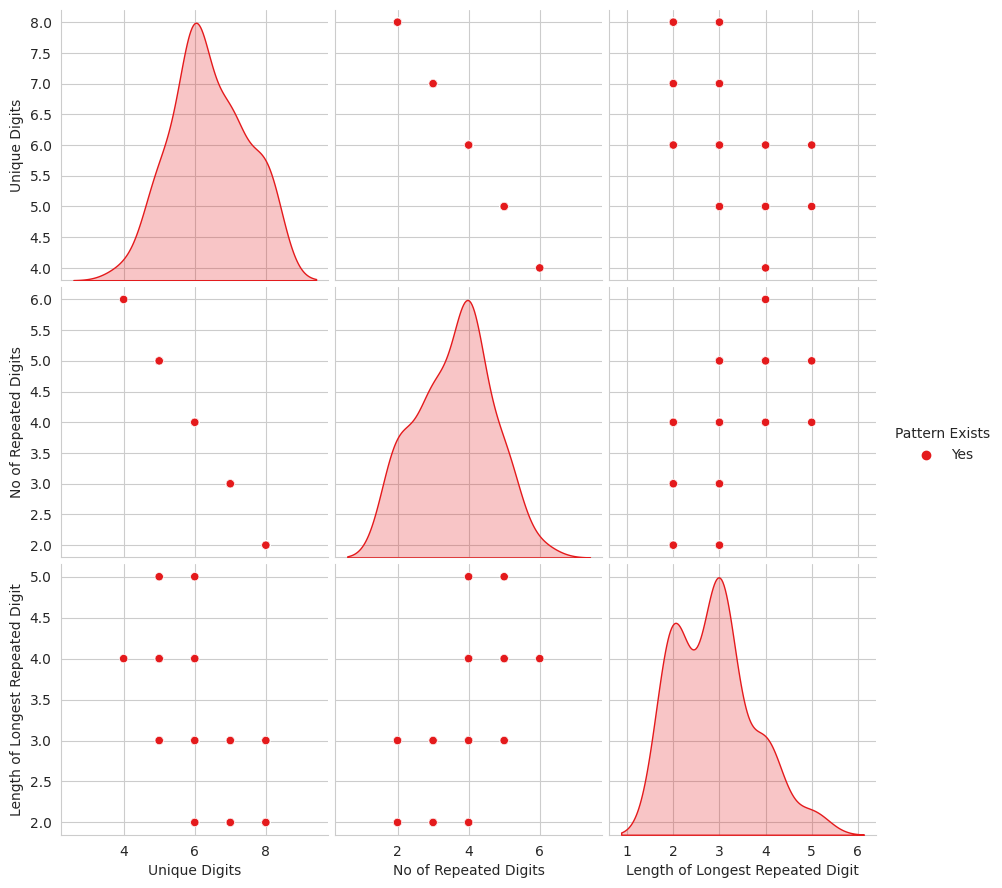

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(
df[["Unique Digits", "No of Repeated Digits", "Length of Longest Repeated Digit", "Pattern Exists", "Price Category"]],
hue = "Pattern Exists",
height = 3,
palette = "Set1")

<ipython-input-45-d7d72c698a14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

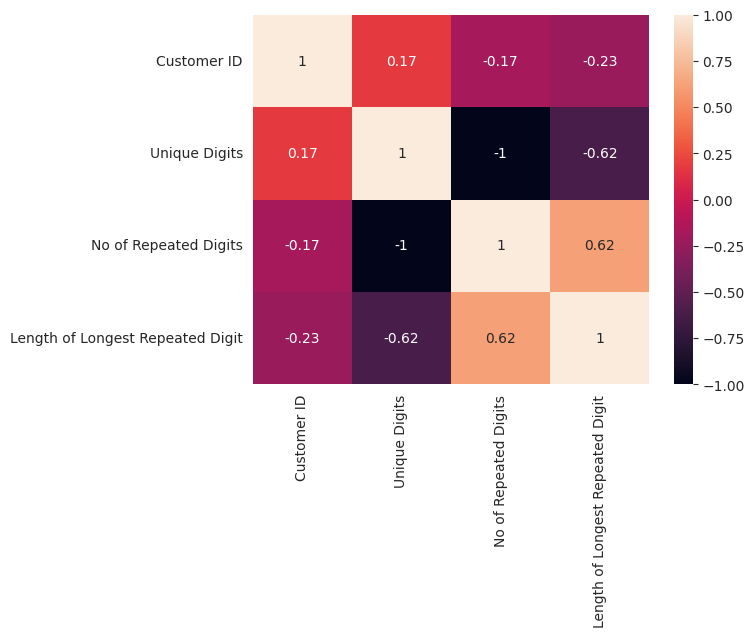

In [ ]:
sns.heatmap(df.corr(), annot= True)

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.columns

Index(['Customer ID', 'Unique Digits', 'No of Repeated Digits',
       'Length of Longest Repeated Digit', 'Pattern Exists_Yes',
       'Price Category_High', 'Price Category_Low', 'Price Category_Medium'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)
print("Training Dataset:", X_train.shape)
print("Test Dataset:", X_test.shape)

Training Dataset: (40, 6)
Test Dataset: (10, 6)


In [ ]:
classifier = tree.DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)
model

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          38       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       1.0
          94       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       0.0
          98       0.00      0.00      0.00       2.0

    accuracy                           0.00      10.0
   macro avg       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
model.score(X_test, y_test)

0.0

In [ ]:
y_pred = model.predict(X_test)
report = metrics.classification_report(y_test, y_pred)
print(report)
model.score(X_test, y_test)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       0.0
          19       0.00      0.00      0.00       0.0
          38       0.00      0.00      0.00       0.0
          42       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       0.0
          53       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          88       0.00      0.00      0.00       1.0
          94       0.00      0.00      0.00       0.0
          95       0.00      0.00      0.00       1.0
          97       0.00      0.00      0.00       0.0
          98       0.00      0.00      0.00       2.0

    accuracy                           0.00      10.0
   macro avg       0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

0.0